In [1]:
from Utils.loadset import getDataSet
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import figure
import numpy as np


tfk = tf.keras
tfkl = tf.keras.layers
tfpl = tfp.layers
tfd = tfp.distributions
import os
from trainer import Trainer
try:
    from Utils.connection_cfg import *
except Exception as e:
    PSWD = None
    USRN = None
    
from Utils.Data import dataWrapper
from Utils.transform import ToCategorical, cutOut

Num GPUs Available: 1


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0],28,28,1)
#y_train = y_train.reshape(y_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
#y_test = y_test.reshape(y_train.shape[0],28,28,1)

x_train = x_train / 255.0
x_test = x_test / 255.0

(60000, 28, 28)


In [5]:
def test_ae(input_shape,activation="relu"):
    inputs = Input(shape=input_shape)
    layer = Conv2D(16, kernel_size=(3, 3), padding="same") (inputs)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    layer  = MaxPooling2D((2, 2), strides=(2, 2))(layer)
    
    layer = Conv2D(32, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    layer  = MaxPooling2D((2, 2), strides=(2, 2))(layer)
    
    layer = Conv2D(64, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    #layer = MaxPooling2D((2, 2), strides=(2, 2))(layer)
    
    layer = UpSampling2D((2, 2))(layer)
    layer = Conv2D(32, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    
    layer = UpSampling2D((2, 2))(layer)
    layer = Conv2D(32, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    layer = Conv2D(1, kernel_size=(3, 3), padding="same") (layer)
    
    model = Model(inputs=inputs, outputs=layer)
    return model

In [6]:
print(x_train.shape)
model = test_ae([28,28,1])
model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=Adam( lr= 1e-5 ))
model.summary()

(60000, 28, 28, 1)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
activation_5 (Activation)    (None, 14, 

In [7]:
model.fit(x_train,x_train,epochs=200,batch_size=400)

Train on 60000 samples
Epoch 1/200
60000/60000 [==============================] - 4s 72us/sample - loss: 1.4541
Epoch 2/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.7264
Epoch 3/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4385
Epoch 4/200
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2999
Epoch 5/200
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2232
Epoch 6/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1753
Epoch 7/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1428
Epoch 8/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1195
Epoch 9/200
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1021
Epoch 10/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0887
Epoch 11/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0

60000/60000 [==============================] - 2s 40us/sample - loss: 0.0066
Epoch 92/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0065
Epoch 93/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0064
Epoch 94/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0063
Epoch 95/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0062
Epoch 96/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0061
Epoch 97/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0061
Epoch 98/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0060
Epoch 99/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0059
Epoch 100/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0058
Epoch 101/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0058
Epoch 102/200
60000/6

60000/60000 [==============================] - 2s 40us/sample - loss: 0.0035
Epoch 182/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0034
Epoch 183/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0034
Epoch 184/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0034
Epoch 185/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0034
Epoch 186/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0034
Epoch 187/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0034
Epoch 188/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0034
Epoch 189/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0034
Epoch 190/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0033
Epoch 191/200
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0033
Epoch 192/200

In [8]:
pred = model(x_train[:10])
pred = 255*pred
pred = tf.image.convert_image_dtype(pred,dtype=tf.uint8)
label = tf.image.convert_image_dtype(x_train[:10]*255,dtype=tf.uint8)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



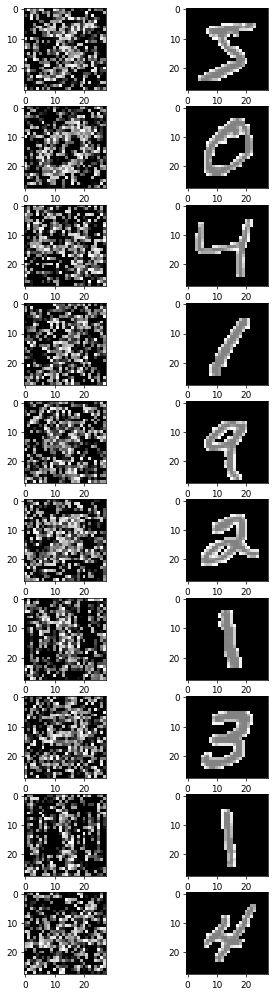

In [9]:

fig, axes = plt.subplots(10, 2, figsize=(6,20),dpi=64)

for batch,img in enumerate(pred):
    axes[batch,0].imshow(img[:,:,0],cmap="gray")
    axes[batch,1].imshow(label[batch,:,:,0],cmap="gray")

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_train.max())
x_train = x_train / 255.0
x_train = x_train.reshape(x_train.shape[0],28,28,1)
#y_train = y_train.reshape(y_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

def NLL(y_true, y_hat):
    return -y_hat.log_prob(y_true)

def test_ae_poisson(input_shape,activation="relu"):
    inputs = Input(shape=input_shape)
    layer = Conv2D(16, kernel_size=(3, 3), padding="same") (inputs)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    layer  = MaxPooling2D((2, 2), strides=(2, 2))(layer)
    
    layer = Conv2D(32, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    layer  = MaxPooling2D((2, 2), strides=(2, 2))(layer)
    
    layer = Conv2D(64, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    #layer = MaxPooling2D((2, 2), strides=(2, 2))(layer)
    
    layer = UpSampling2D((2, 2))(layer)
    layer = Conv2D(32, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    
    layer = UpSampling2D((2, 2))(layer)
    layer = Conv2D(1, kernel_size=(3, 3), padding="same") (layer)
    layer = Flatten()(layer)
    layer = Dense(28*28)(layer)
    layer = Activation(activation)(layer)
    layer = Dense(28*28)(layer)
    layer = tfp.layers.IndependentPoisson((28,28,1))(layer)
    
    model = Model(inputs=inputs, outputs=layer)
    return model

(60000, 28, 28)
255


In [11]:
model_poisson = test_ae_poisson([28,28,1])
model_poisson.compile(loss=NLL, optimizer=Adam( lr= 1e-3 ))
model_poisson.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 32)        0   

In [12]:
model_poisson.fit(x_train,x_train,epochs=200,batch_size=300)

Train on 60000 samples
Epoch 1/200
60000/60000 [==============================] - 3s 44us/sample - loss: 178.4455
Epoch 2/200
60000/60000 [==============================] - 2s 31us/sample - loss: 138.3367
Epoch 3/200
60000/60000 [==============================] - 2s 31us/sample - loss: 133.6525
Epoch 4/200
60000/60000 [==============================] - 2s 31us/sample - loss: 131.3146
Epoch 5/200
60000/60000 [==============================] - 2s 31us/sample - loss: 129.7336
Epoch 6/200
60000/60000 [==============================] - 2s 31us/sample - loss: 128.5898
Epoch 7/200
60000/60000 [==============================] - 2s 31us/sample - loss: 127.6992
Epoch 8/200
60000/60000 [==============================] - 2s 31us/sample - loss: 127.1406
Epoch 9/200
60000/60000 [==============================] - 2s 31us/sample - loss: 126.3216
Epoch 10/200
60000/60000 [==============================] - 2s 31us/sample - loss: 125.8290
Epoch 11/200
60000/60000 [==============================] - 2s 31u

60000/60000 [==============================] - 2s 31us/sample - loss: 119.6136
Epoch 90/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.5829
Epoch 91/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.5748
Epoch 92/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.5637
Epoch 93/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.5803
Epoch 94/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.5573
Epoch 95/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.5676
Epoch 96/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.5434
Epoch 97/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.5126
Epoch 98/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.5159
Epoch 99/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.5062
E

60000/60000 [==============================] - 2s 31us/sample - loss: 119.0965
Epoch 178/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.0938
Epoch 179/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.1027
Epoch 180/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.0837
Epoch 181/200
60000/60000 [==============================] - 2s 32us/sample - loss: 119.0936
Epoch 182/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.1067
Epoch 183/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.0740
Epoch 184/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.0781
Epoch 185/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.0638
Epoch 186/200
60000/60000 [==============================] - 2s 31us/sample - loss: 119.0644
Epoch 187/200
60000/60000 [==============================] - 2s 31us/sample - loss: 

In [20]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
x_train = x_train 
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_train = x_train / 255.0


#y_train = y_train.reshape(y_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
pred = model_poisson(x_train[:10]).stddev()
#pred = tf.image.convert_image_dtype(pred,dtype=tf.uint8)
#label = tf.image.convert_image_dtype(x_train[:10],dtype=tf.uint8)

(60000, 28, 28)


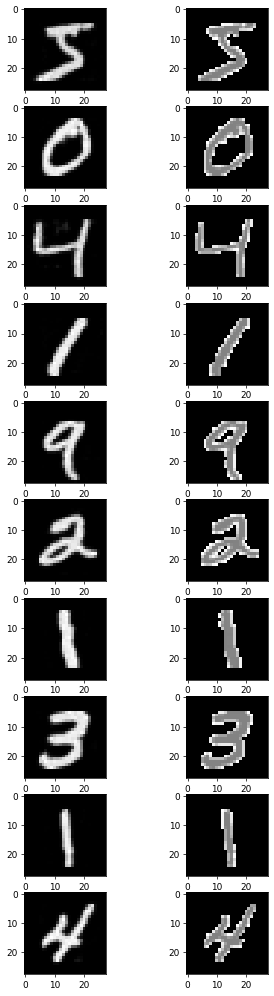

In [21]:
fig, axes = plt.subplots(10, 2, figsize=(6,20),dpi=64)

for batch,img in enumerate(pred):
    axes[batch,0].imshow(img[:,:,0],cmap="gray")
    axes[batch,1].imshow(label[batch,:,:,0],cmap="gray")

In [1]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_train.max())
x_train = x_train / 255.0
x_train = x_train.reshape(x_train.shape[0],28,28,1)
#y_train = y_train.reshape(y_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

def NLL(y_true, y_hat):
    return -y_hat.log_prob(y_true)

def test_ae_poisson_zf(input_shape,activation="relu"):
    def zeroInflatedPoisson(output):
        rate = tf.math.exp(output[:,:,:,0:1]) #A 
        s = tf.math.sigmoid(output[:,:,:,1:2])
        
        pos = tfp.distributions.Poisson(rate=rate)
        det = tfp.distributions.Deterministic(loc=tf.zeros_like(rate))
        components = [det,pos]
        mixture = tfd.Mixture(
              cat=tfd.Categorical(probs=tf.stack([1-s, s],axis=-1)),#D
              components=components)
        return tfp.distributions.Independent(mixture,reinterpreted_batch_ndims=1,name="ZeroInflated")
    
    inputs = Input(shape=input_shape)
    layer = Conv2D(16, kernel_size=(3, 3), padding="same") (inputs)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    layer  = MaxPooling2D((2, 2), strides=(2, 2))(layer)
    
    layer = Conv2D(32, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    layer  = MaxPooling2D((2, 2), strides=(2, 2))(layer)
    
    layer = Conv2D(64, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    #layer = MaxPooling2D((2, 2), strides=(2, 2))(layer)
    
    layer = UpSampling2D((2, 2))(layer)
    layer = Conv2D(32, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    
    layer = UpSampling2D((2, 2))(layer)
    layer = Conv2D(2, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    #layer = Flatten()(layer)
    layer = tfp.layers.DistributionLambda(zeroInflatedPoisson,name="ZPoisson")(layer)
    
    model = Model(inputs=inputs, outputs=layer)
    return model

NameError: name 'tf' is not defined

In [5]:
model_poisson_zf = test_ae_poisson_zf([28,28,1])
model_poisson_zf.compile(loss=NLL, optimizer=Adam( lr= 1e-5 ))
model_poisson_zf.summary()

ValueError: in converted code:

    /home_ext/ios/anaconda3/envs/DeepRain/lib/python3.6/site-packages/tensorflow_probability/python/layers/distribution_layer.py:213 call
        inputs, *args, **kwargs)
    /home_ext/ios/anaconda3/envs/DeepRain/lib/python3.6/site-packages/tensorflow_core/python/keras/layers/core.py:846 call
        result = self.function(inputs, **kwargs)
    /home_ext/ios/anaconda3/envs/DeepRain/lib/python3.6/site-packages/tensorflow_probability/python/layers/distribution_layer.py:161 _fn
        d = make_distribution_fn(*fargs, **fkwargs)
    <ipython-input-4-eb985f947e29>:14 zeroInflatedPoisson
        rate = tf.math.exp(output[:,:,:,0:1]) #A
    /home_ext/ios/anaconda3/envs/DeepRain/lib/python3.6/site-packages/tensorflow_core/python/ops/array_ops.py:898 _slice_helper
        name=name)
    /home_ext/ios/anaconda3/envs/DeepRain/lib/python3.6/site-packages/tensorflow_core/python/ops/array_ops.py:1064 strided_slice
        shrink_axis_mask=shrink_axis_mask)
    /home_ext/ios/anaconda3/envs/DeepRain/lib/python3.6/site-packages/tensorflow_core/python/ops/gen_array_ops.py:9535 strided_slice
        shrink_axis_mask=shrink_axis_mask, name=name)
    /home_ext/ios/anaconda3/envs/DeepRain/lib/python3.6/site-packages/tensorflow_core/python/framework/op_def_library.py:742 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /home_ext/ios/anaconda3/envs/DeepRain/lib/python3.6/site-packages/tensorflow_core/python/framework/func_graph.py:595 _create_op_internal
        compute_device)
    /home_ext/ios/anaconda3/envs/DeepRain/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:3322 _create_op_internal
        op_def=op_def)
    /home_ext/ios/anaconda3/envs/DeepRain/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:1786 __init__
        control_input_ops)
    /home_ext/ios/anaconda3/envs/DeepRain/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:1622 _create_c_op
        raise ValueError(str(e))

    ValueError: Index out of range using input dim 2; input has only 2 dims for 'ZPoisson/strided_slice' (op: 'StridedSlice') with input shapes: [?,1568], [4], [4], [4] and with computed input tensors: input[3] = <1 1 1 1>.


In [71]:
model_poisson_zf.fit(x_train,x_train,epochs=100,batch_size=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.7323
Epoch 2/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.6331
Epoch 3/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5995
Epoch 4/100
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5762
Epoch 5/100
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5608
Epoch 6/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5476
Epoch 7/100
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5329
Epoch 8/100
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5231
Epoch 9/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5180
Epoch 10/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5358
Epoch 11/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.6

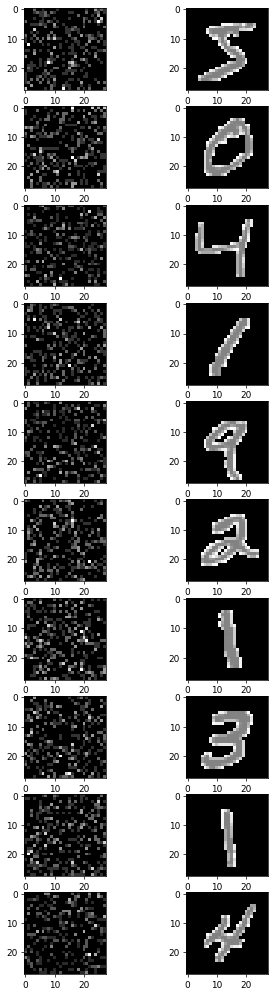

In [73]:
pred = model_poisson_zf(x_train[:10])

fig, axes = plt.subplots(10, 2, figsize=(6,20),dpi=64)

for batch,img in enumerate(pred):
    axes[batch,0].imshow(img[:,:,0],cmap="gray")
    axes[batch,1].imshow(label[batch,:,:,0],cmap="gray")

In [30]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('int32')
x_train = x_train /255.0
x_train = x_train - 0.5


x_train = x_train.reshape(x_train.shape[0],28,28,1)
#y_train = y_train.reshape(y_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(x_train.min(),x_train.max())
def NLL(y_true, y_hat):
    return -y_hat.log_prob(y_true)

def test_ae_Normal(input_shape,activation="relu"):
 
    
    inputs = Input(shape=input_shape)
    layer = Conv2D(16, kernel_size=(3, 3), padding="same") (inputs)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    layer  = MaxPooling2D((2, 2), strides=(2, 2))(layer)
    
    layer = Conv2D(32, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    layer  = MaxPooling2D((2, 2), strides=(2, 2))(layer)
    
    layer = Conv2D(64, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    #layer = MaxPooling2D((2, 2), strides=(2, 2))(layer)
    
    layer = UpSampling2D((2, 2))(layer)
    layer = Conv2D(32, kernel_size=(3, 3), padding="same") (layer)
    layer = Activation(activation)(layer)
    layer = BatchNormalization()(layer)
    
    layer = UpSampling2D((2, 2))(layer)
    layer = Conv2D(2, kernel_size=(3, 3), padding="same") (layer)
    layer = Flatten()(layer)
    layer = Dense(28*28*2)(layer)
    layer = Activation(activation)(layer)
    layer = Dense(28*28*2)(layer)
    
    #layer = Flatten()(layer)
    #layer = Conv2D((tfpl.IndependentNormal.params_size(2)),kernel_size=(3,3),padding="same")  (layer)
    layer = tfp.layers.IndependentNormal((28,28,1))(layer)
    
    model = Model(inputs=inputs, outputs=layer)

    return model

-0.5 0.5


In [39]:
model_normal = test_ae_Normal([28,28,1])
model_normal.compile(loss=NLL, optimizer=Adam( lr= 1e-7 ))
model_normal.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
activation_49 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
activation_50 (Activation)   (None, 14, 14, 32)        0  

In [44]:

model_normal.fit(x_train,x_train,epochs=18)

Train on 60000 samples
Epoch 1/18
60000/60000 [==============================] - 8s 129us/sample - loss: 6.8677
Epoch 2/18
60000/60000 [==============================] - 8s 126us/sample - loss: -12.3097
Epoch 3/18
60000/60000 [==============================] - 8s 128us/sample - loss: -30.9826
Epoch 4/18
60000/60000 [==============================] - 8s 127us/sample - loss: -49.0851
Epoch 5/18
58208/60000 [============================>.] - ETA: 0s - loss: -66.3526

KeyboardInterrupt: 

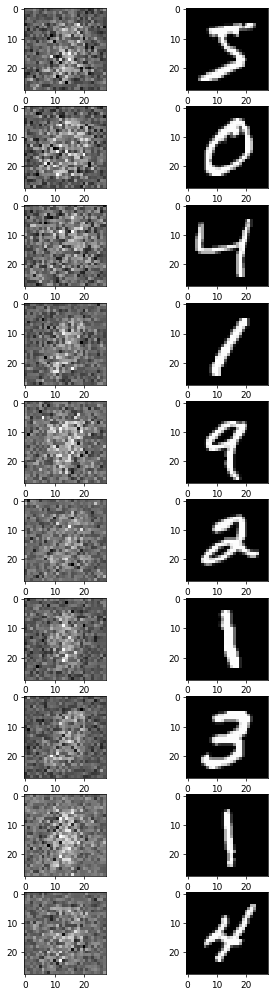

In [43]:
pred = model_normal(x_train[:10]).st
label = x_train[:10]
fig, axes = plt.subplots(10, 2, figsize=(6,20),dpi=64)

for batch,img in enumerate(pred):
    axes[batch,0].imshow((img[:,:,0] + 0.5)*255 ,cmap="gray")
    axes[batch,1].imshow((label[batch,:,:,0] + 0.5) *255,cmap="gray")